# Module: subframing

This module is designed to interface with data produced by IDES Relativity, which splits the camera into a matrix of subframes, enabling a higher framerate than the native capability of the camera.
The frames on the camera are generally slightly overlapping and highly distorted.

This notebook demos: 
* reading the .mrc files containing the subframed images
* locating the subframes and cropping them
* measuring the distortion in each subframe
* extracting a corrected DataCube

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import py4DSTEM

In [3]:
fpath = '/global/cscratch1/sd/sezelt/relativity/20190410 4DSTEM Torpedos/Data from TIA folder/4dstem_Torpedos_3_20190410_175820.mrc'

scratch = '/global/cscratch1/sd/sezelt/relativity/scan3temp.npy'

In [4]:
mrc = py4DSTEM.file.io.read(fpath,load='relativity')

/global/cscratch1/sd/sezelt/relativity/20190410 4DSTEM Torpedos/Data from TIA folder/4dstem_Torpedos_3_20190410_175820.mrc is not a py4DSTEM file.
Reading an IDES Relativity MRC file...


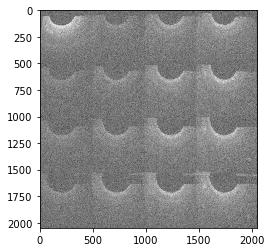

In [5]:
testDP = mrc.data[1152,:,:].astype(float)+80.
plt.imshow(testDP**0.7)

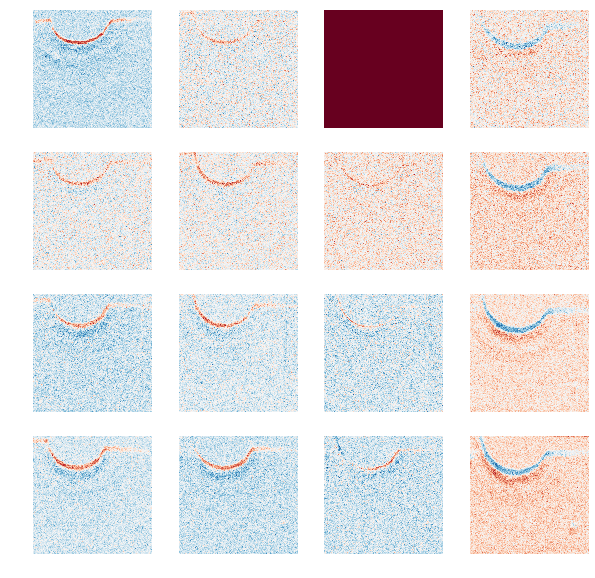

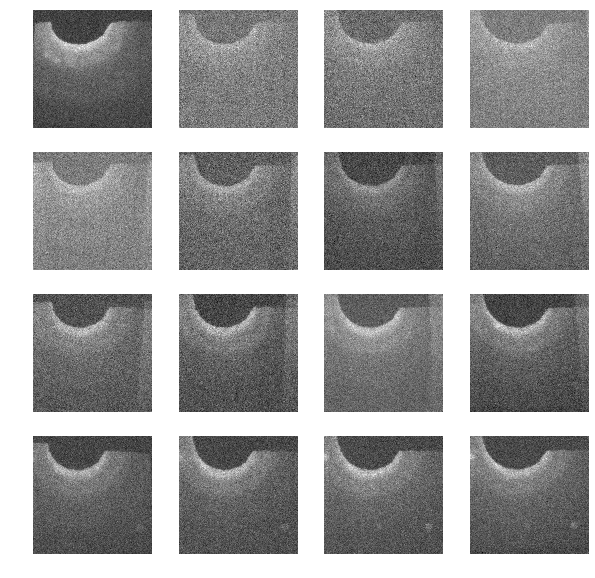

In [6]:
anchorDP=2

cx = (512*np.array((1,2,3,4)))-256
cy = (512*np.array((1,2,3,4)))-256

centx, centy = np.meshgrid(cy,cx)

optx, opty, err = py4DSTEM.process.preprocess.subframe_align(testDP,centx, centy, wx=480,wy=480,
                                niter=5,maxshift=50,anchorDP=anchorDP, 
                                corrPower=0.5, damping=1)

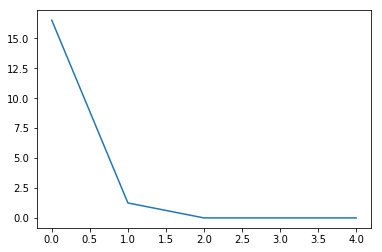

In [7]:
plt.plot(err)

In [8]:
scanshape = np.array((64,64))
dc = py4DSTEM.process.preprocess.slice_mrc_stack(mrc,scratch,scanshape,optx,opty,944,480,480)

FloatProgress(value=0.0, max=255.0)

Sliced 4096 diffraction patterns in 0h 0m 26s


In [9]:
dc.data.shape

(64, 64, 480, 480)

/global/homes/s/sezelt/.conda/envs/py4d/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


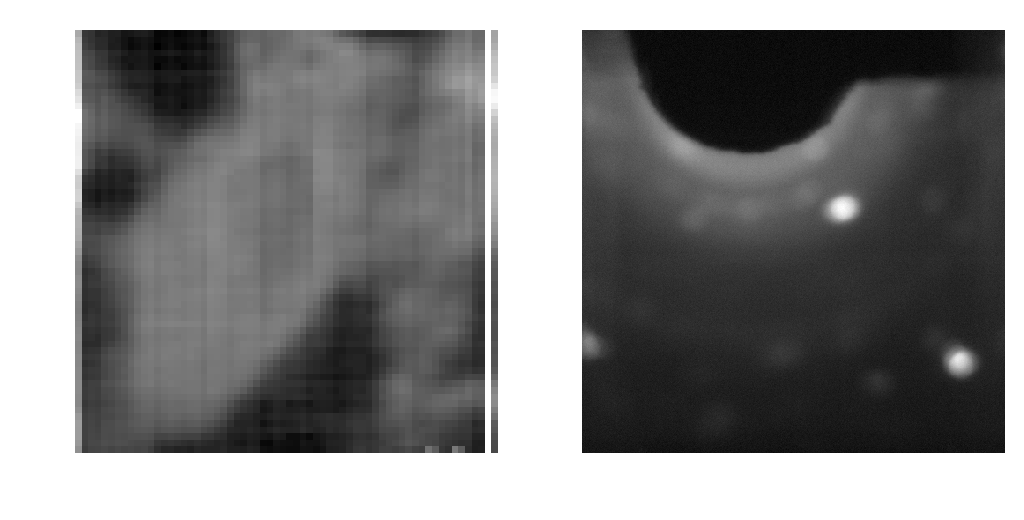

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,dpi=200)

ax1.imshow(np.sum(dc.data,(2,3))**0.5)
ax1.axis('off')
ax2.imshow(np.sum(dc.data+80,(0,1))**0.5)
ax2.axis('off')

plt.show()